# ECON 31703 Problem Set 1 - Arjun Gopinath and Tugce Turk

In [1]:
# Standard Python Imports

import numpy as np
import pandas as pd
from numba import njit
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from numpy import random
from numpy import linalg
from scipy import sparse
from scipy import stats

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amssymb}',
    r'\usepackage{amsmath}',
    r'\usepackage{xcolor}',
    r'\renewcommand*\familydefault{\sfdefault}']
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams['pgf.preamble']  = [
    r'\usepackage[utf8x]{inputenc}',
    r'\usepackage{amssymb}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{amsmath}',
    r'\usepackage{sansmath}']

inv, ax = np.linalg.inv, np.newaxis
norm = np.random.normal

## Exercise 1

In [207]:
def Exercise_1(N_ind, N_var, N_sim, p_max):
    
    """
        N_ind: Number of individuals in each dataset
        N_var: Number of variables (observables) in each dataset
        N_sim: Number of simulations (or datasets) for the exercise
        p_max: Number of covariates used in OLS starting from X_1
    """
    
    # Generate data for X_1, ... , X_99, ϵ from N(0, 𝕀) where 𝕀 is of size 100 \times 100
    # The data is generated at once for ALL simulations.
    data_sim = norm(size=(N_sim, N_var + 1, N_ind)) # N_sim x N_var x N_ind
    
    # Generate outcome variable for each individual in each simulation
    # Y = X_1 + ϵ
    Y_sim = data_sim[:, [0, -1], :].sum(axis=1) # N_sim x N_ind
    
    # Generate covariates used for OLS within each simulated dataset
    X_sim = data_sim[:, 0:p_max, :] # N_sim x p_max x N_ind
    
    # Create X'X and X'Y for each simulation 
    XX_sim = np.einsum('pqr, psr -> pqs', X_sim, X_sim) # N_sim x p_max x p_max
    XY_sim = np.einsum('pqr, pr -> pq', X_sim, Y_sim)   # N_sim x p_max
    
    # Compute OLS estimator β for each simulation, of size p_max
    β_sim = np.linalg.solve(XX_sim, XY_sim)[:, 0] # N_sim x p_max

    # Compute variance of OLS estimator for each simulation, of size p_max x p_max
    varβ_sim = np.linalg.solve(XX_sim, np.identity(n=p_max)[ax, :, :])[:, 0, 0]

    fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True, dpi=400)
    
    ax1[0].hist(β_sim, bins=200, density=True);
    ax1[0].set_xlabel(r'$\widehat{\beta}^{\operatorname{OLS}}$', fontsize=13);
    ax1[0].axvline(x=1, ls='--', color='k', lw=0.75, label=r'True Value $(1)$');
    ax1[0].legend()

    ax1[1].hist(varβ_sim, bins=200, density=True);
    ax1[1].set_xlabel(r'$\widehat{\operatorname{Var}} \left(\widehat{\beta}^{\operatorname{OLS}}\right)$', fontsize=13);
    ax1[1].axvline(x=0.01, ls='--', color='k', lw=0.75, label=r'True Value $(0.01)$');
    ax1[1].legend()

    fig1.suptitle(r'Density plots of OLS estimates with $p = {}$'.format(p_max), fontsize=16);

    

### Part A

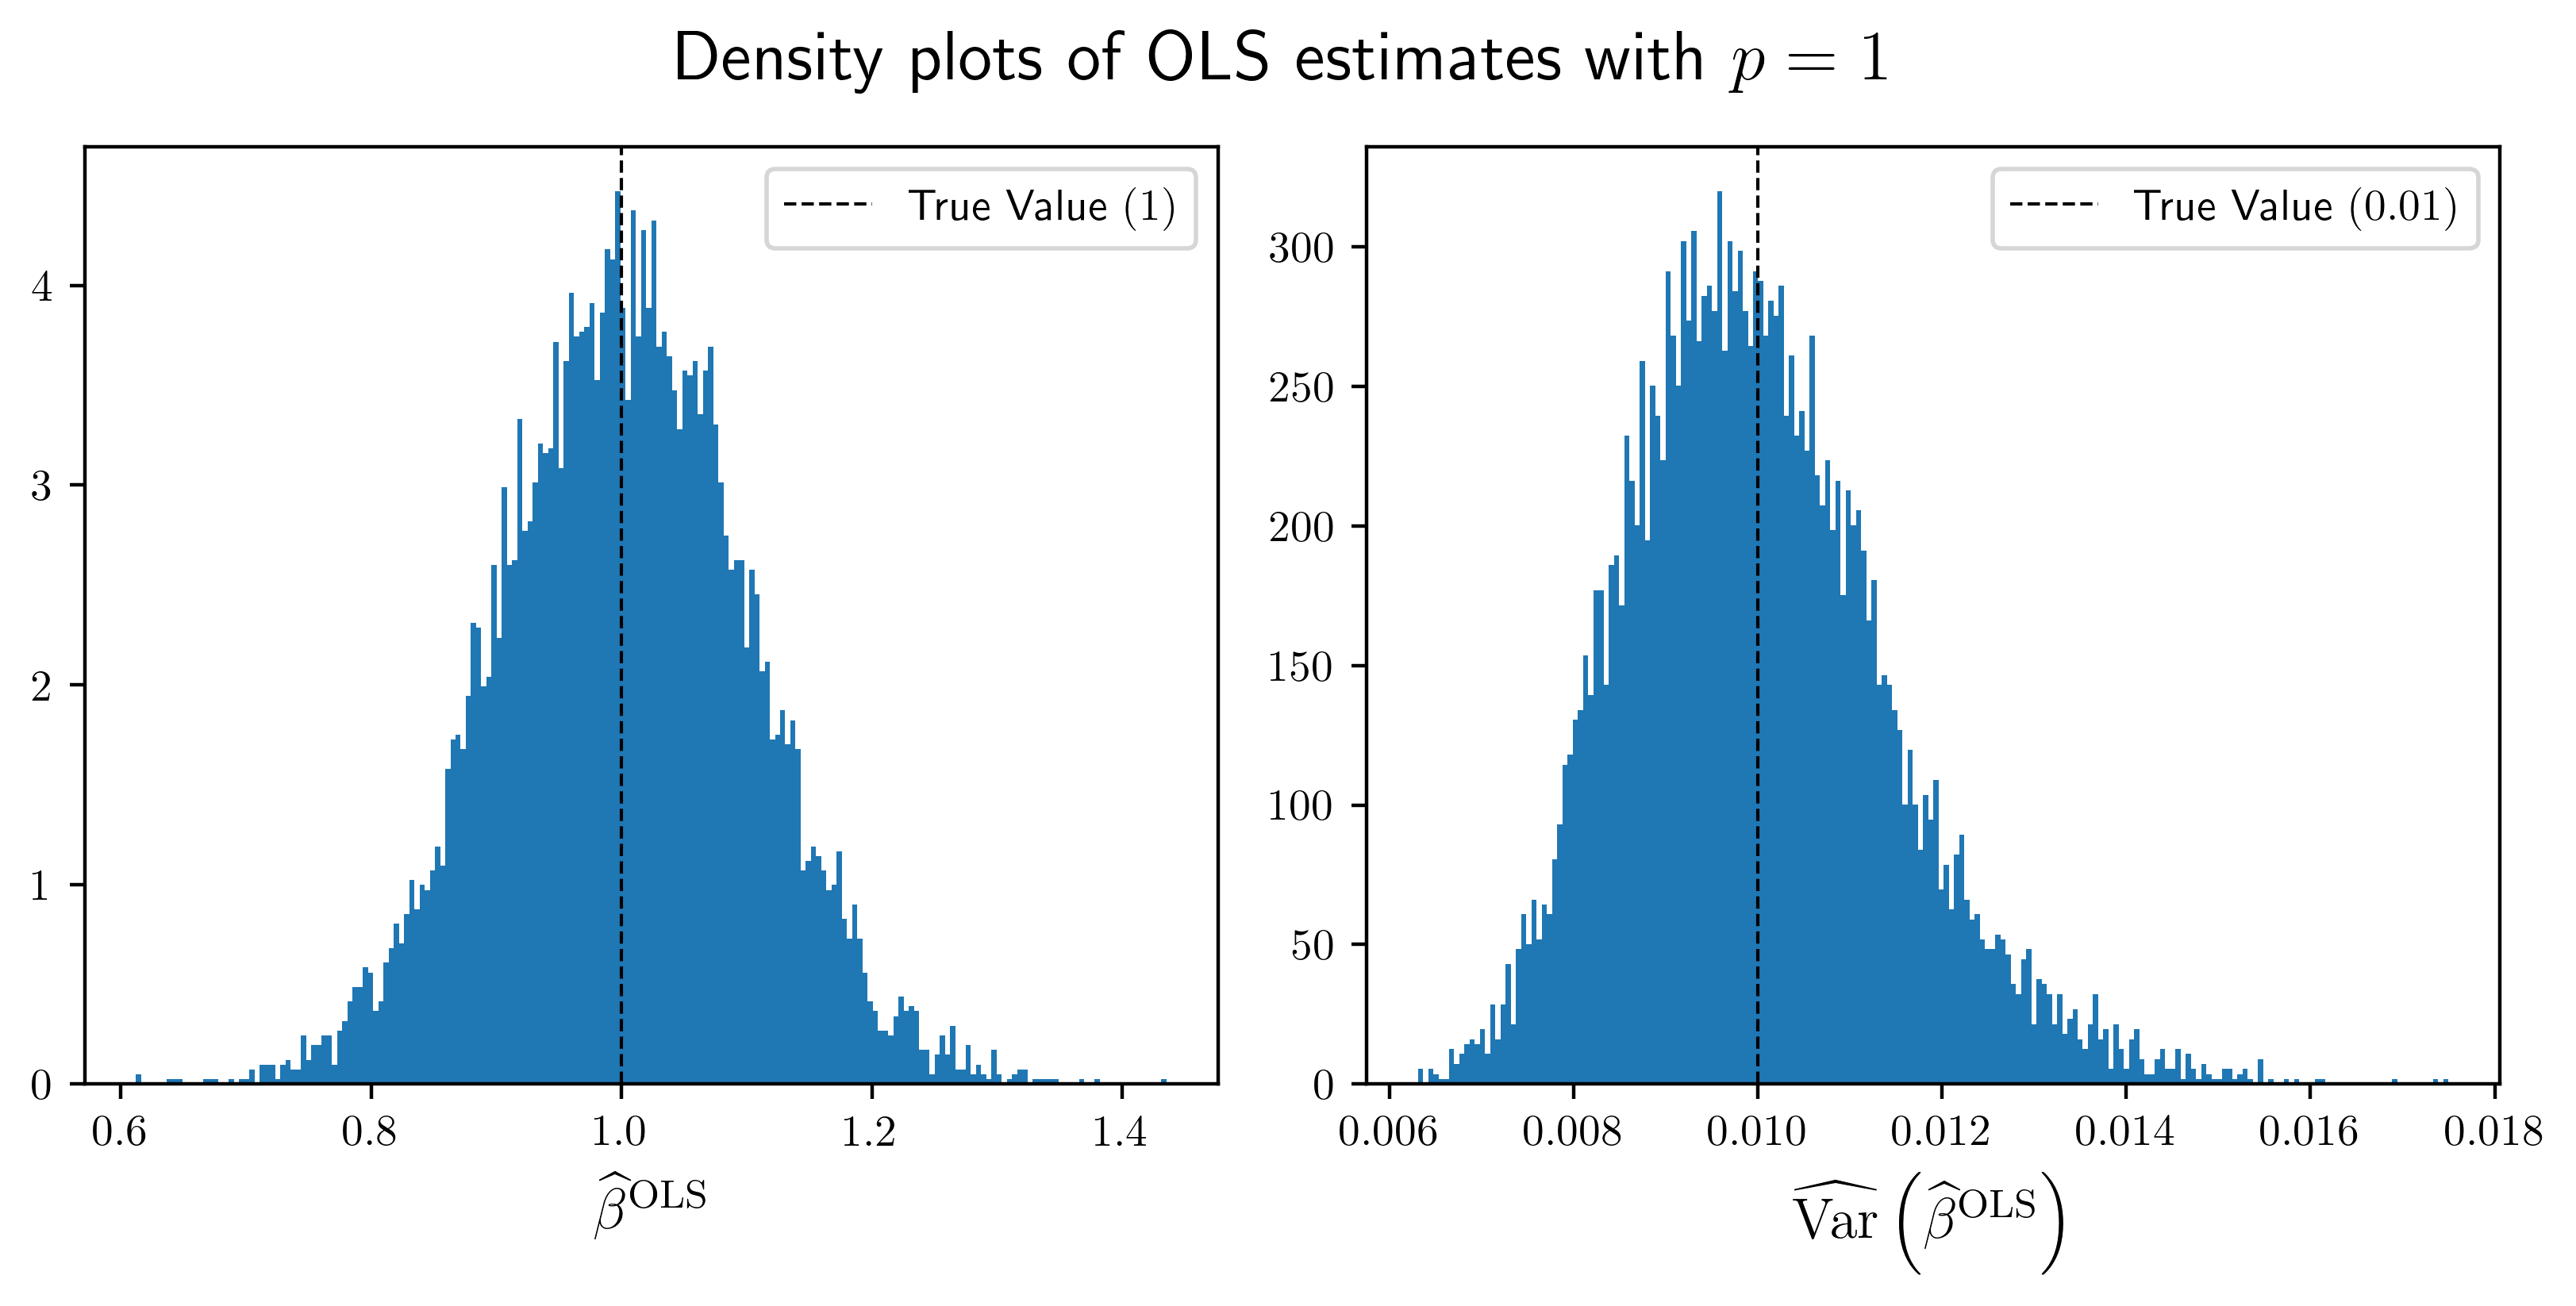

In [209]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=1) 

### Part B

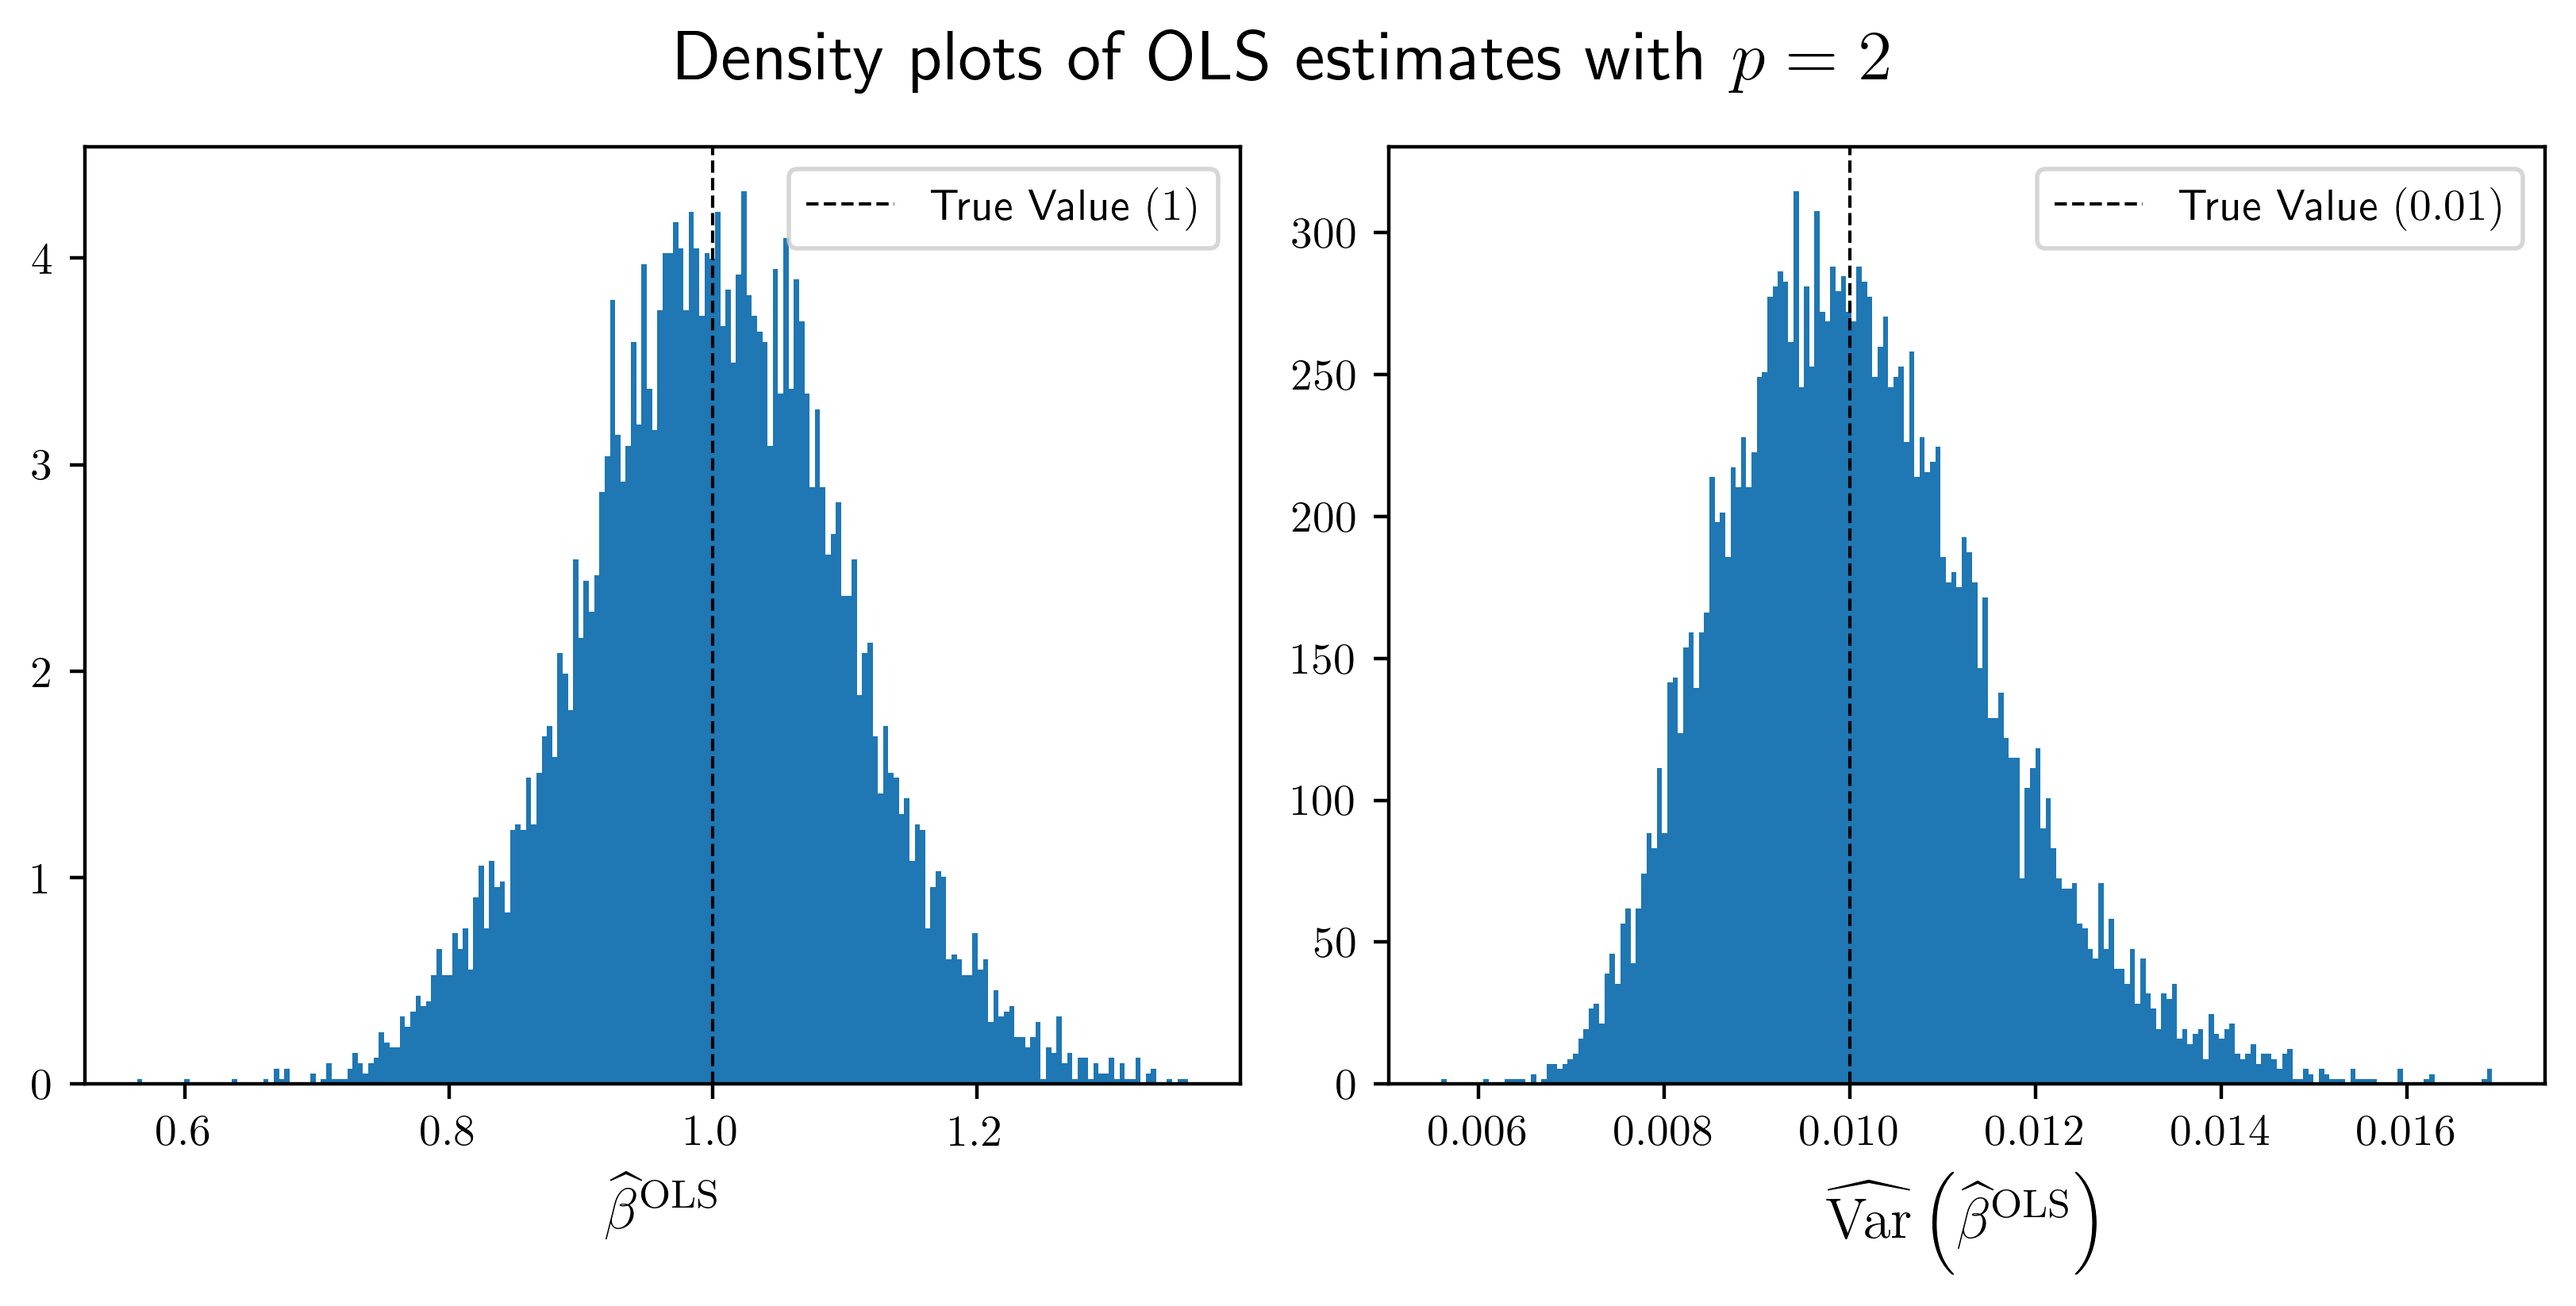

In [210]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=2)

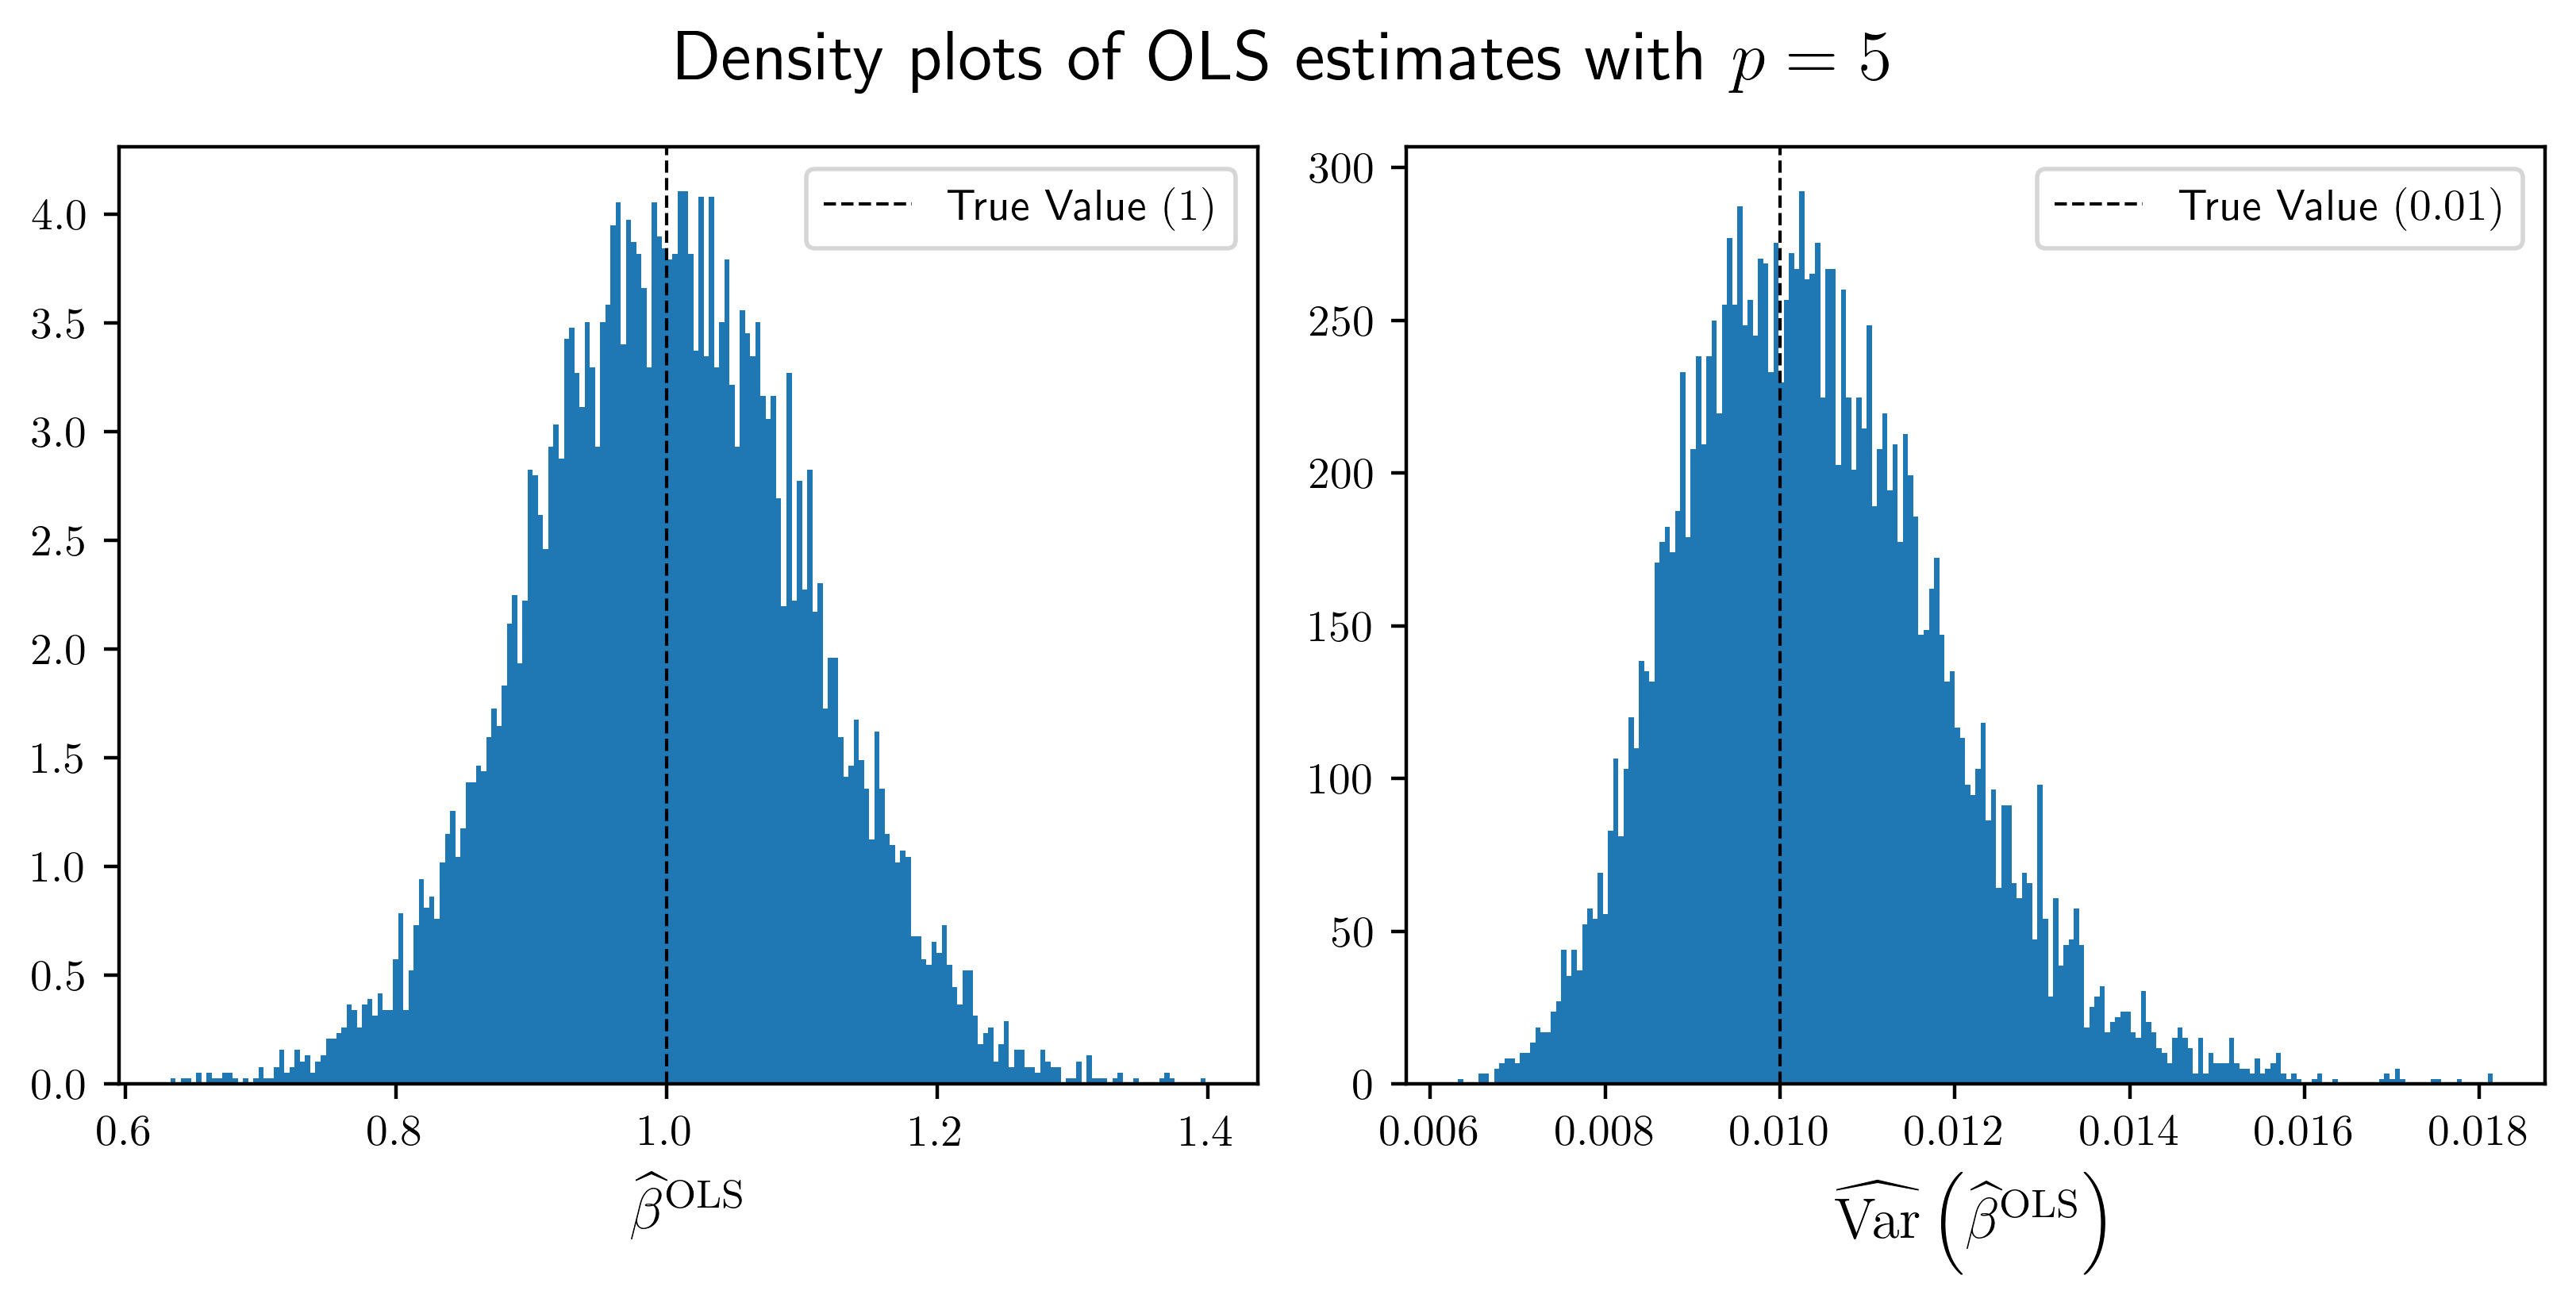

In [211]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=5)

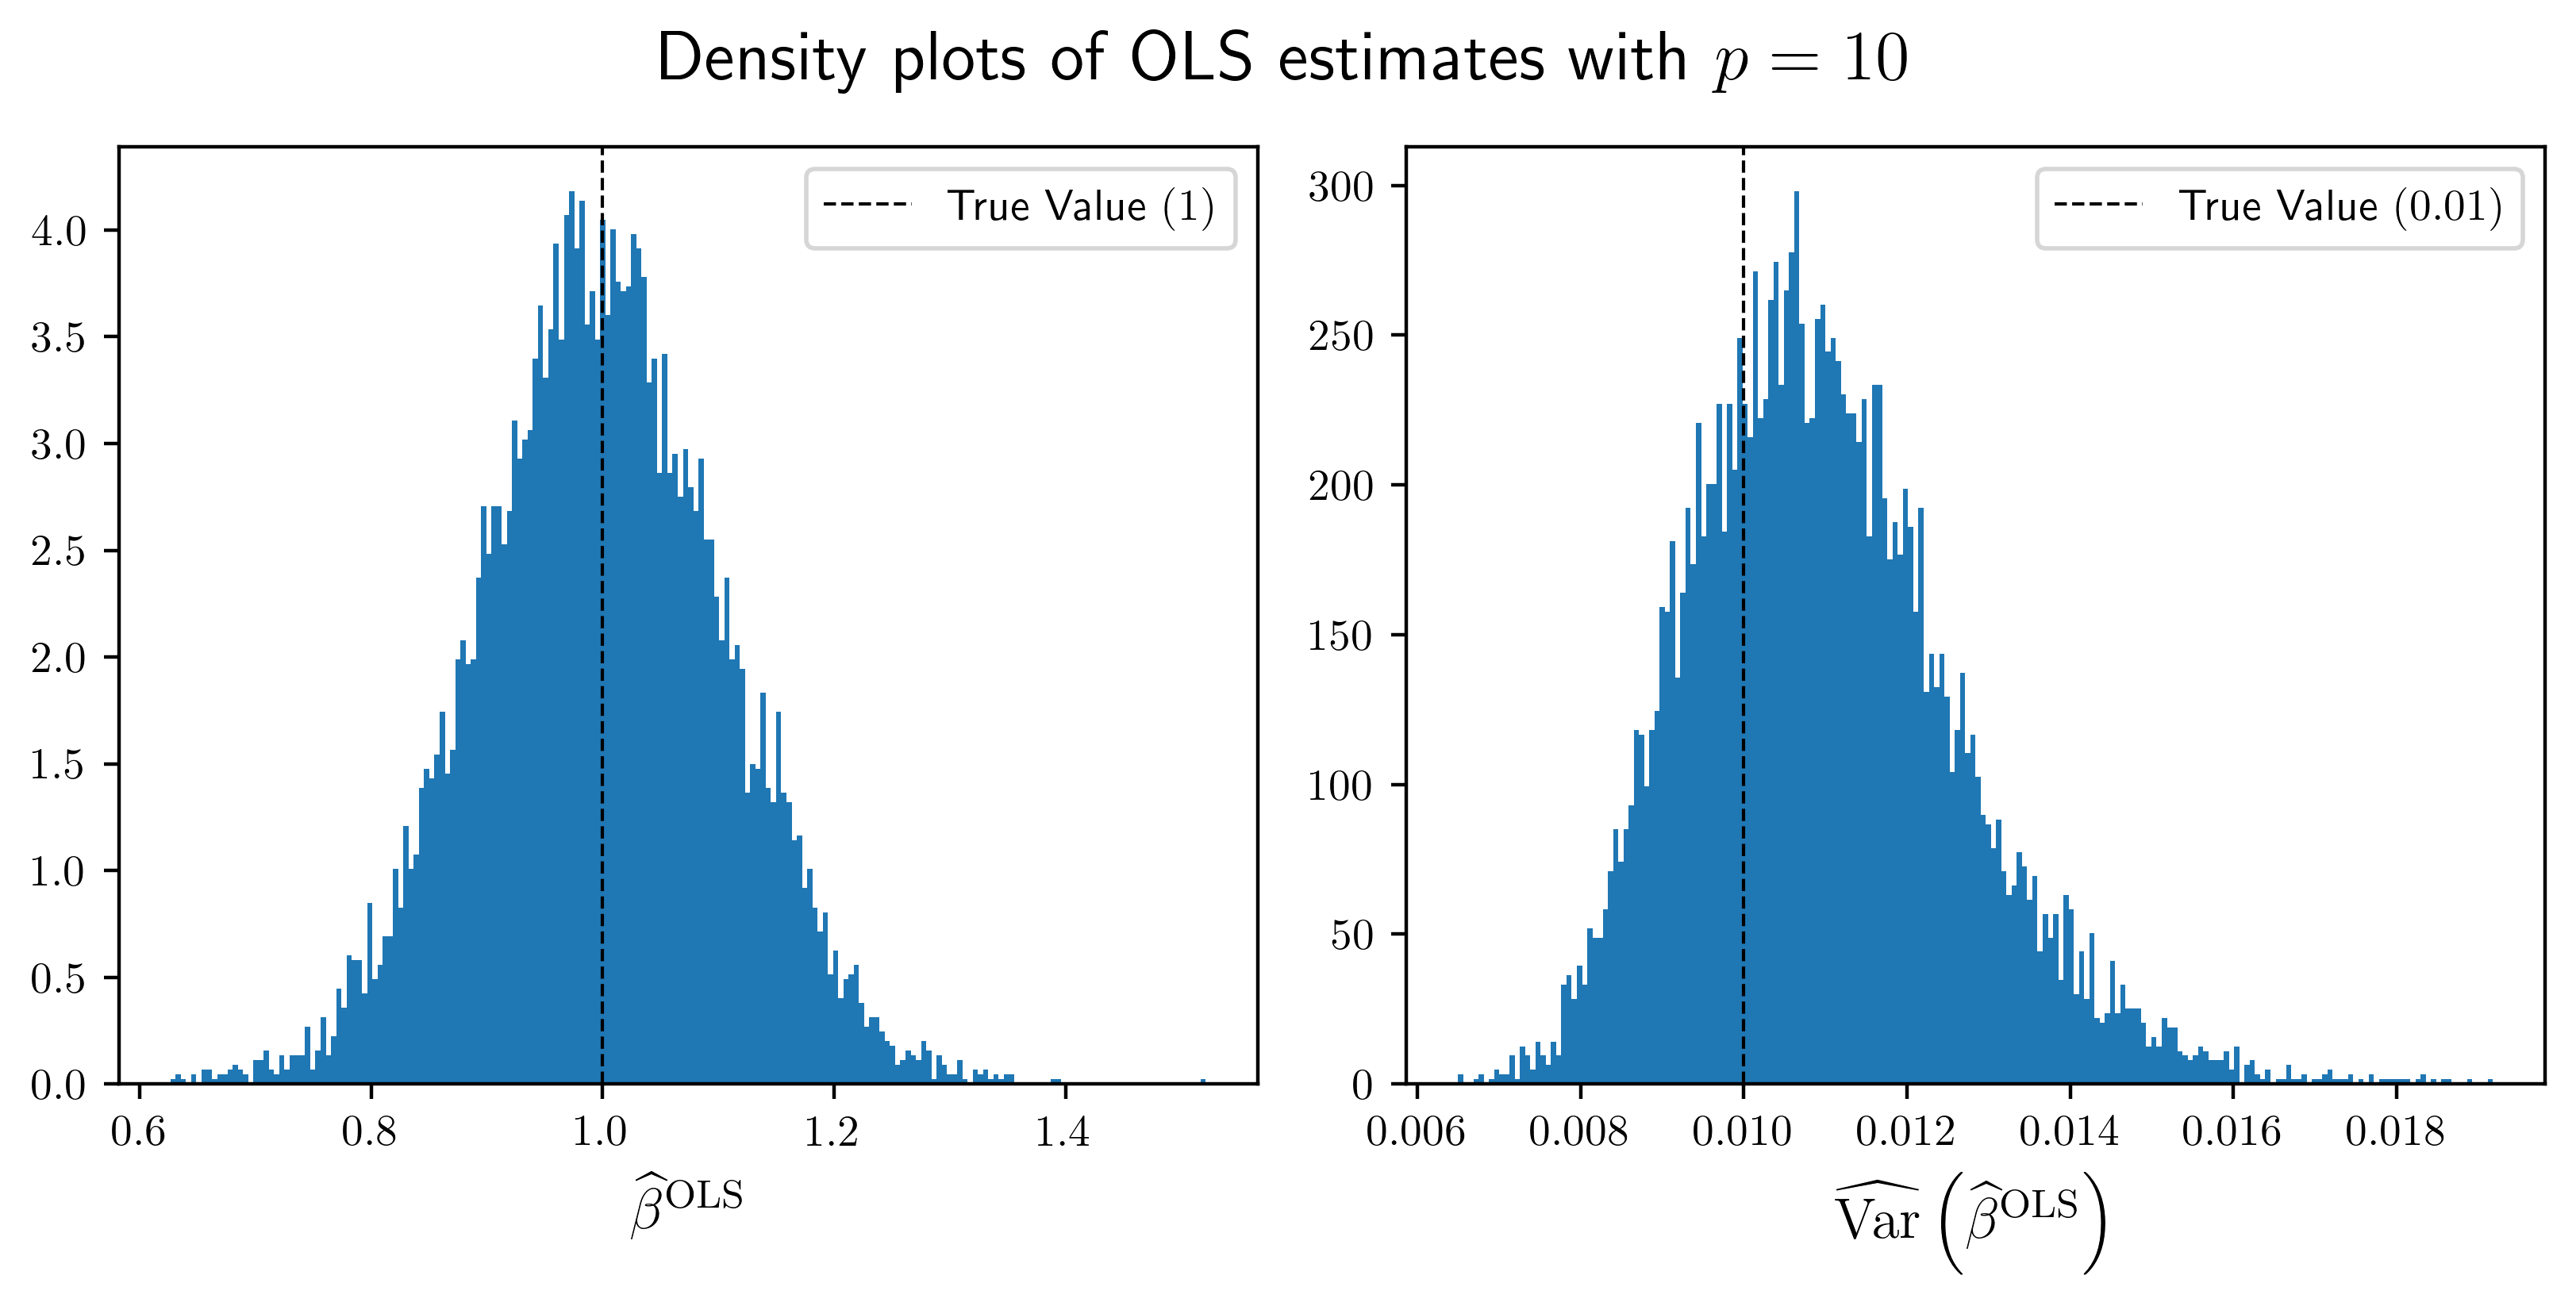

In [212]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=10)

### Part C

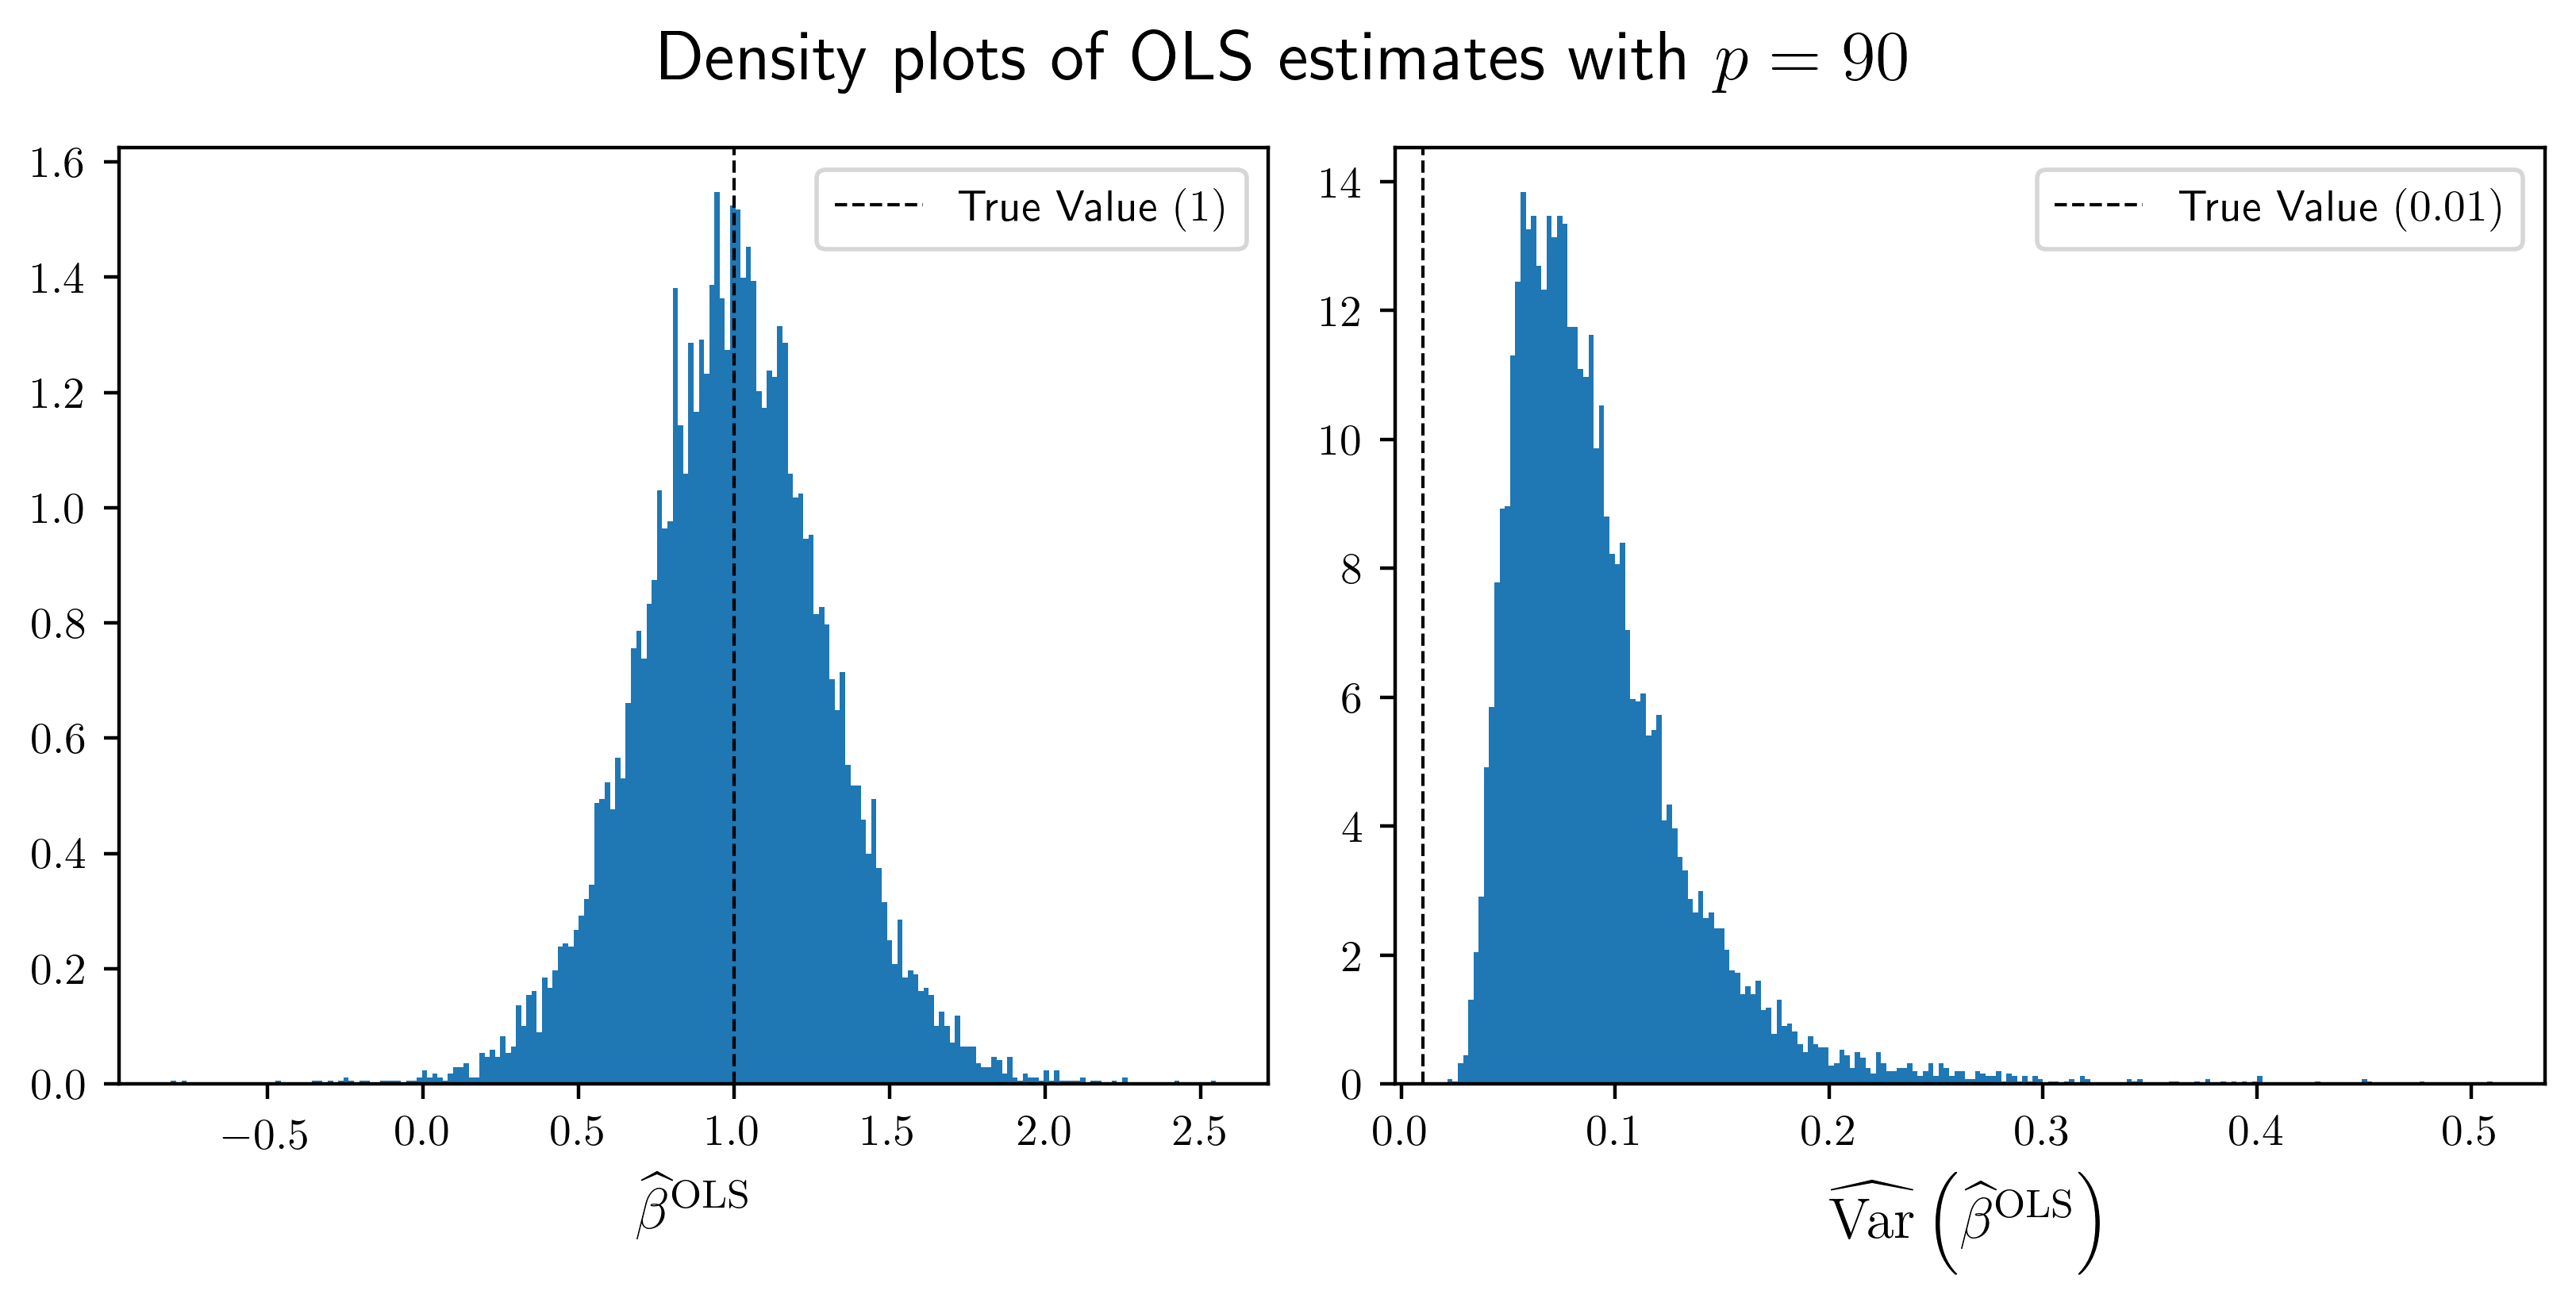

In [213]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=90)

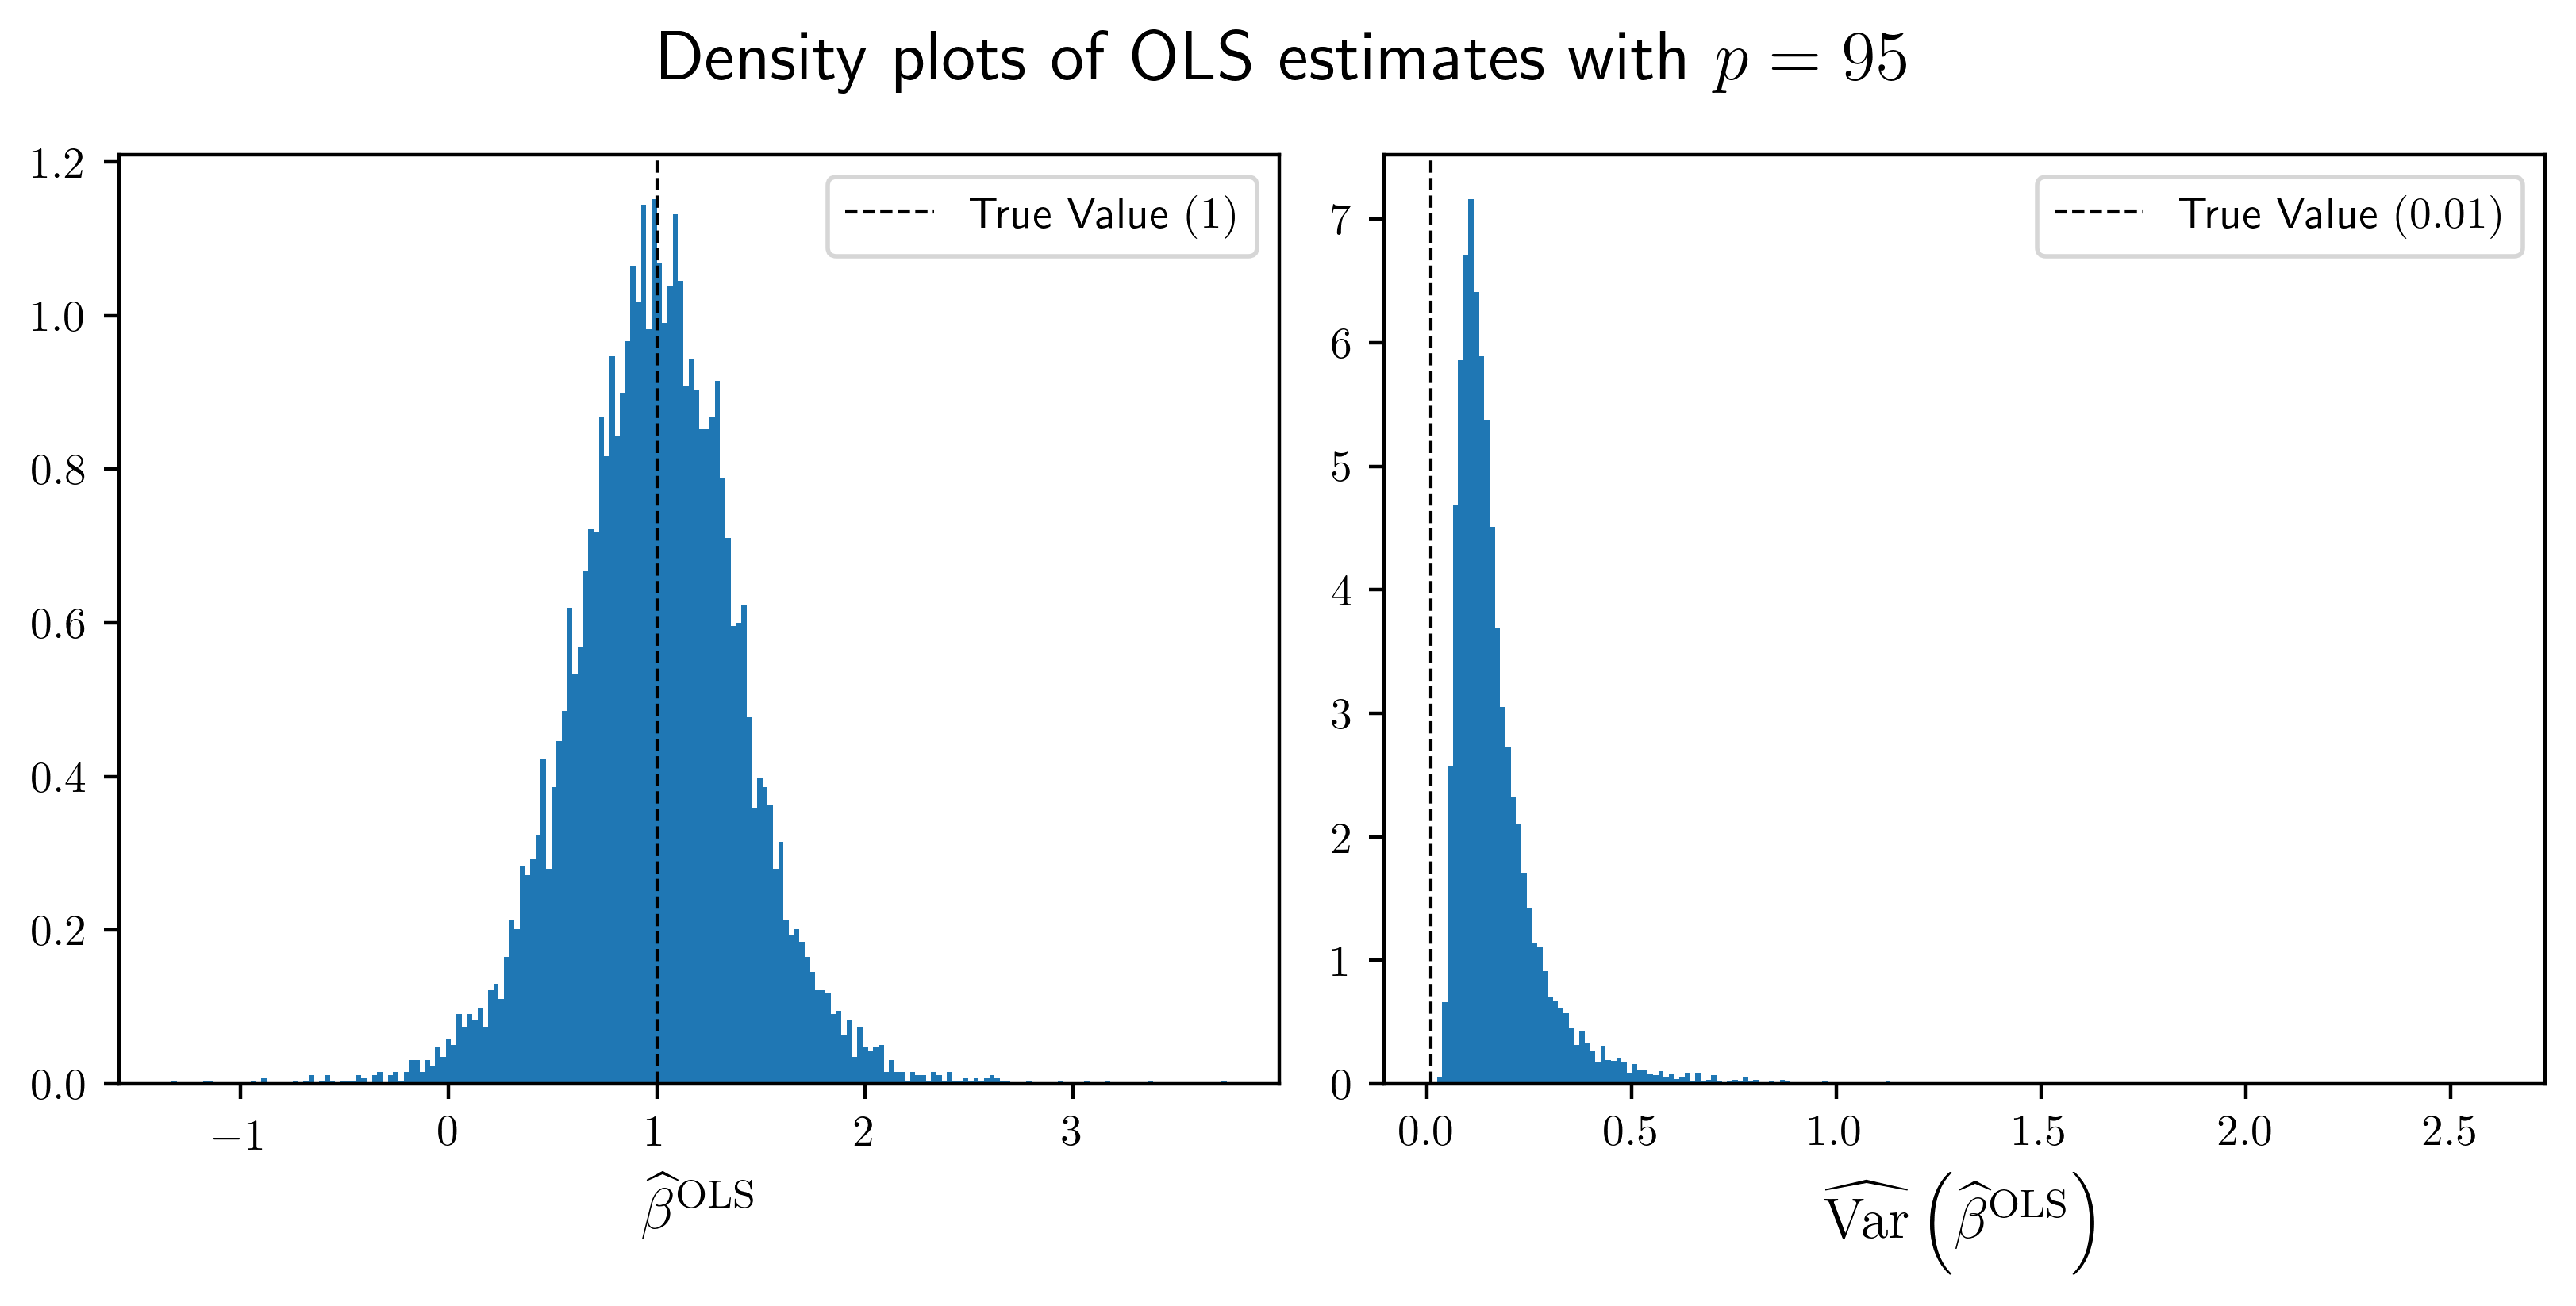

In [214]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=95)

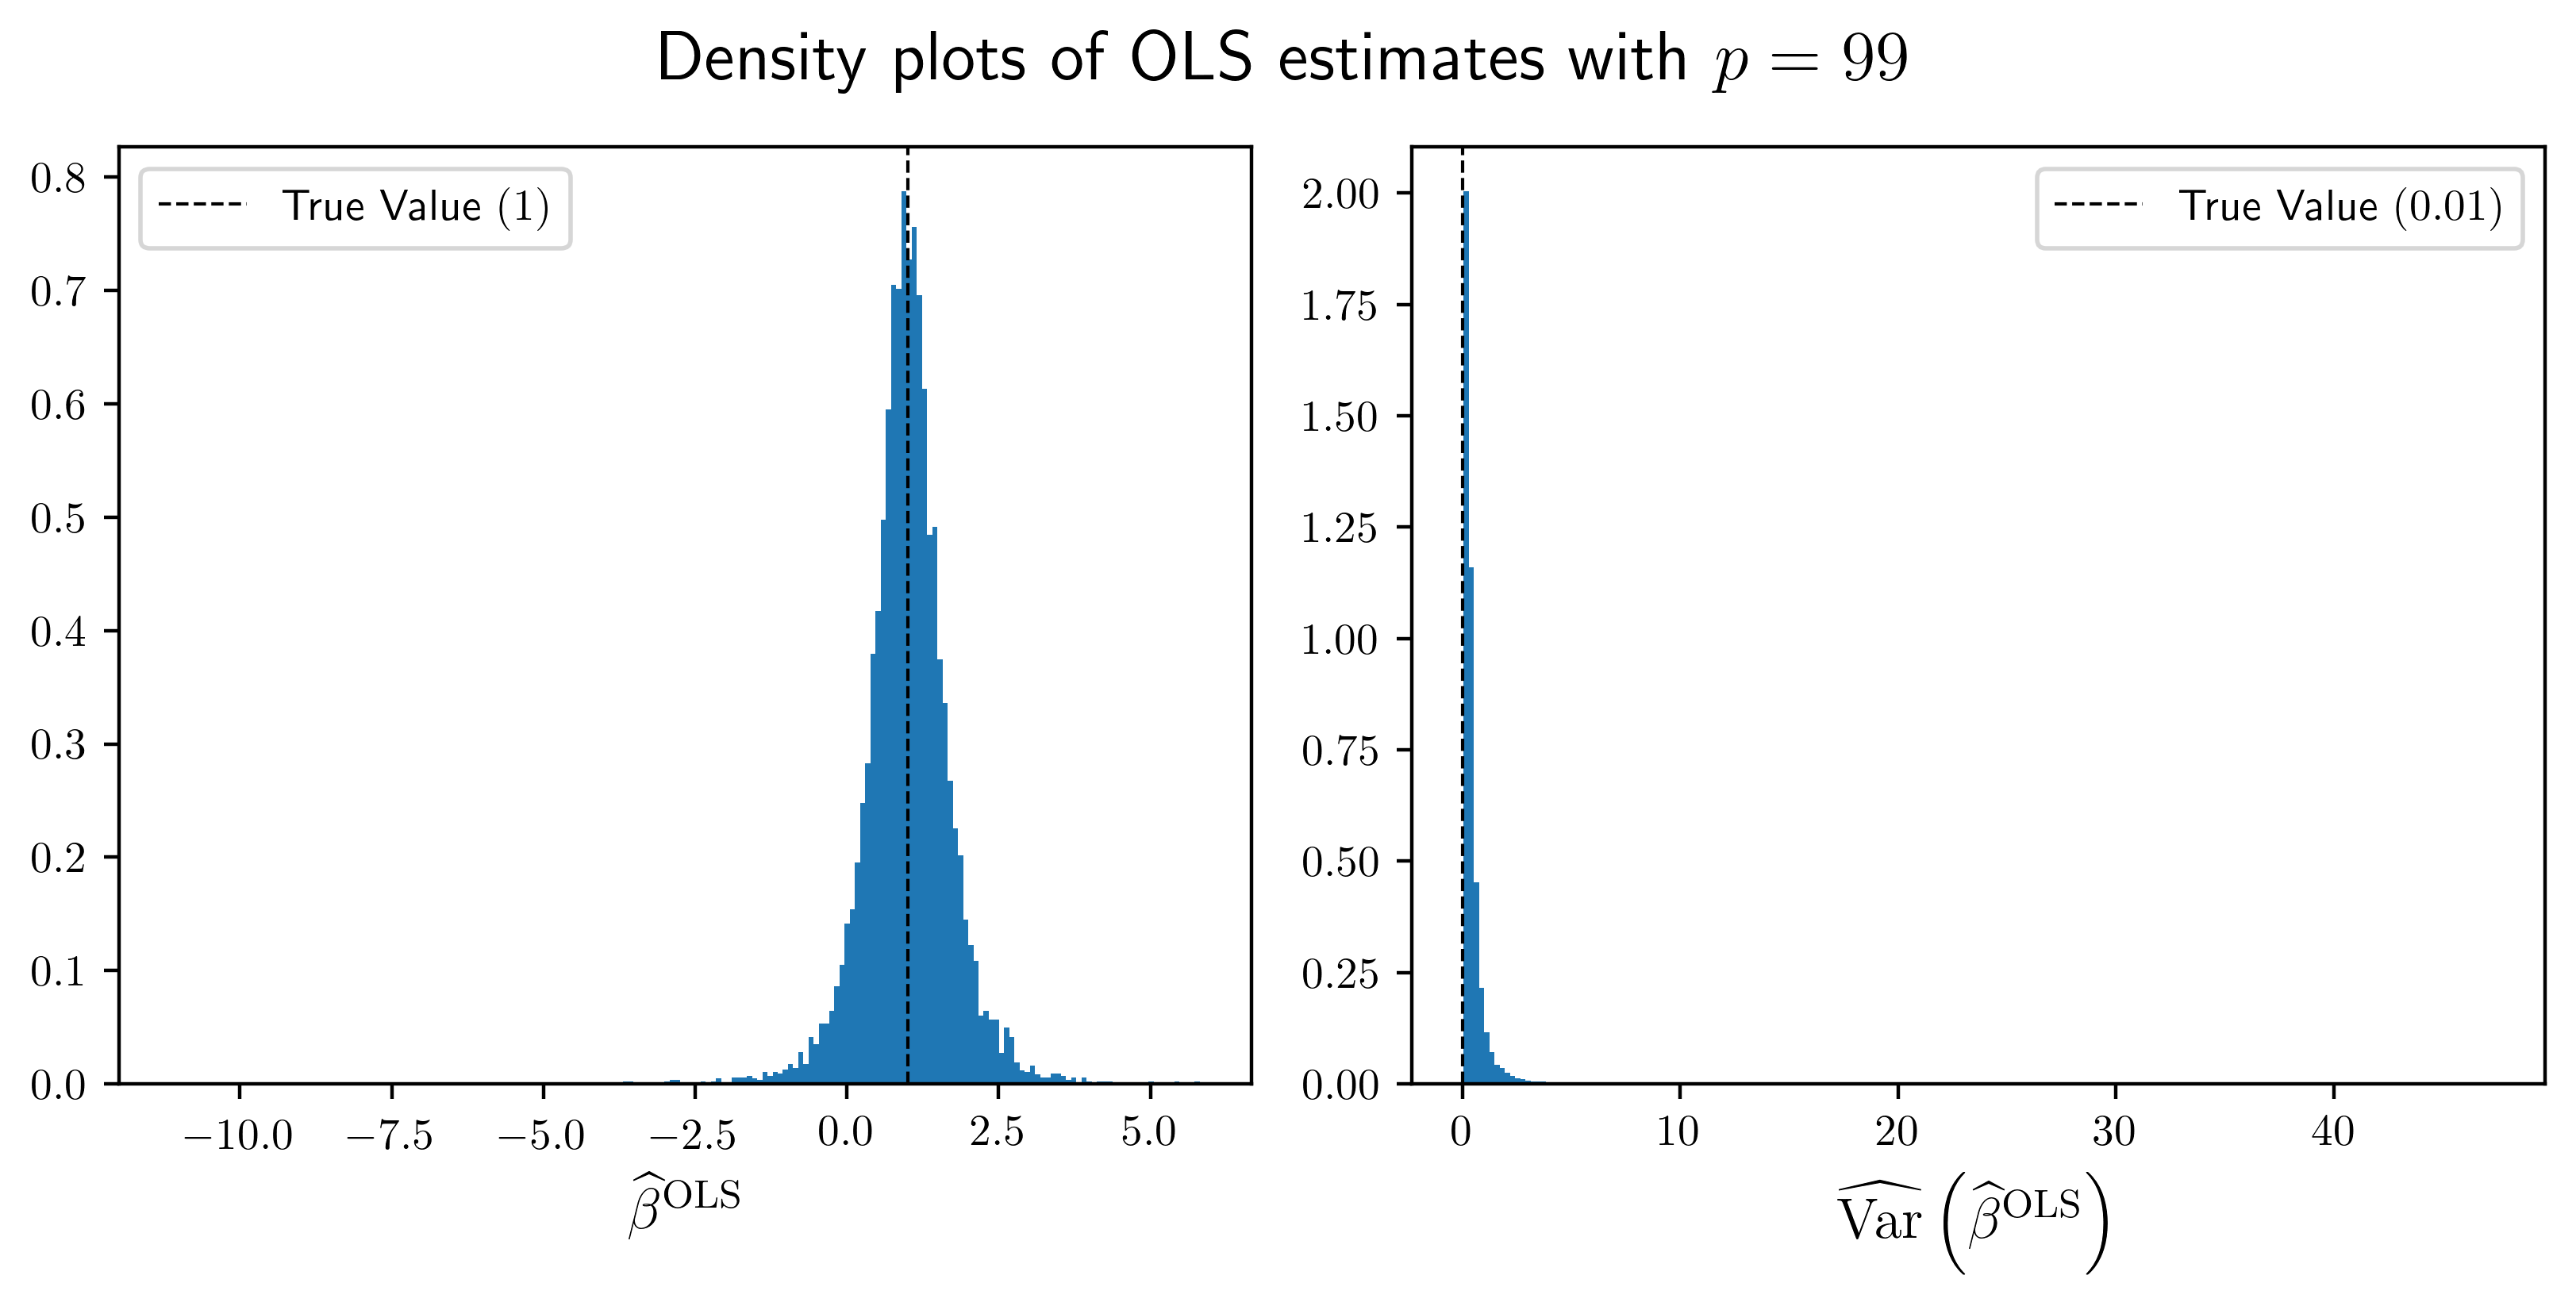

In [215]:
Exercise_1(N_ind=102, N_var=99, N_sim=10000, p_max=99)